# PHYS20762 - Project 3
# Monte Carlo Techniques: Penetration of Neutrons through Shielding
Alejandro Macías Pastor <br>
May 2022

Initialising the Python interpreter:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

## Random Number Generators: Uniformity and spectral tests

### Uniform Distributions

Monte Carlo methods are based on repeated random sampling and therefore a reliable way to randomly produce numbers is needed to incorporate them into any code. <br>
Pseudo-random number generators (or PRNG) are one possibility to generate "random" numbers. A sequence of values produced thorugh a PRNG is not trully random, but completely deterministic. However, it shows statistical randomness, that is, the statistical measures behave just like those of a trully random variable. <br>
A good example of PRNG is any Linear Congruential Generator (LCG), which generates sequences in the following way:
$$ X_{n+1} \equiv (aX_{n}+c) \quad \text{mod}\quad  m$$
where $0<m$ is the modulus, $0\leq a < m$ is the multiplier,  $0<c<m$ is the increment and $0 \leq X_{0}<m$ is known as the seed. With parameters under those conditions, a LCG can be used to produce random numbers between 0 and 1 with precision 1, just by taking:
$$ s_{n} = \frac{X_n}{m}$$
Although LCGs are stil being used today, they have one main problem: the points produced by any given LCG lie on hyperplanes and therefore show correlation. This result is known as Marsaglias' theorem. Looking at the points produced by a random number generator in search of hyperplanes, or lack of them, is known as the spectral test. <br>
Instead of LCGs, the random number generator that this project will be based on is the Python in-built function of the library NumPy numpy.random.uniform(). <br>
Firstly, the uniformity of a sample generated with this function will be studied. After, the spectral test will be acrried out on two sets of 3D points: one generated with np.random.uniform() and one generated through a LCG. <br>

Starting with the test of uniformity:

<IPython.core.display.Javascript object>


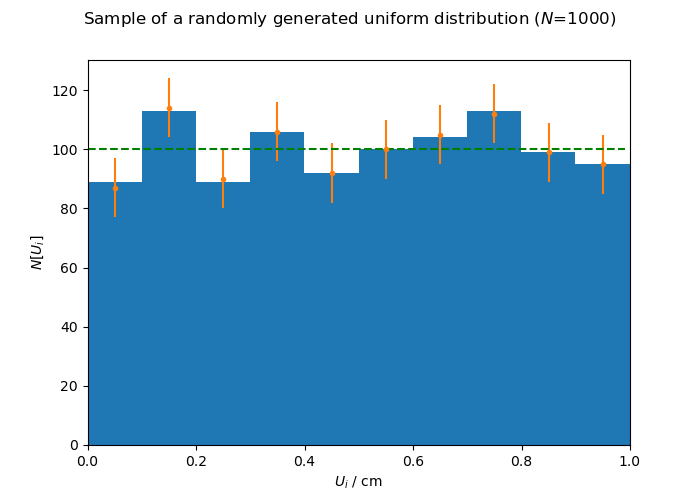

In [146]:
# parameters for the sampling and histogram
n_sample = 1000
n_bins = 10
# array to store the sample
sample = np.zeros(n_sample)
# generating the random uniform sample
for i in range(n_sample):
    sample[i] = np.random.uniform()
# creating the values for the histogram
heights, bin_edges = np.histogram(sample, bins=10, range=(0,1))
# the bin centers are calculated to plot the error bars
bin_centers= 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.rcParams['figure.figsize'] = (7,5)
# plotting the histogram
fig, (hist) = plt.subplots(1,1)
fig.suptitle(f'Sample of a randomly generated uniform distribution ($N$={n_sample})')
hist.hist(sample, bins=n_bins)
hist.set(xlabel='$U_i$ / cm')
hist.set(ylabel='$N[U_i]$')
hist.set_xlim(0,1)
# the error is calculated through the normal approximation, err = sqrt(n_sample)
hist.errorbar(bin_centers, heights, yerr=np.sqrt(n_sample/n_bins), fmt='.')
# the line N=100 shows the ideal shape of the histogram of a uniform distribution for n_sample = 1000
hist.plot(np.arange(0,1,0.01), (n_sample/n_bins)*np.ones(100), 'g--')

plt.show()


The results of the sampling that the NumPy function numpy.random.uniform() is a realiable random number generator for a uniform distribution over the interval $(0,1)$. Although the bins in the histogram do not all share a height of 100 (marked by the green horizontal line), as would be expected from a sample of 1000 taken from a trully uniform distribution, it is mostly within the range shown by the error bars which represent the expected fluctuations, meaning that, statistically speaking, it is safe to assume the sample uniform. As the sample number increases, the uniformity would also increase, bringing closer the height of the bins in the histogram, as the Law of Large Numbers would predict. <br>
The error bars for each bin of were calculated using the normal approximation, $\sigma = \sqrt{\mu}$, instead of the exact value given by a binomial standard deviation $\sigma = \sqrt{\frac{\mu (N-\mu)}{\mu}}$, which would be approximately 5\% smaller.

The next step is to carry out the spectral test over a sample of 3D points generated with np.random.uniform() and a different sample generated using LCGs. <br>
Specifically, the LCG that will be used for this is the RANDU algorithm, which uses the following recursive expression to generate random numbers:
$$ V_{j+1} \equiv (65539V_{j}) \quad \text{mod} \quad 2^{31}$$

In [2]:
def random_xyz(n):
    # initializing arrays to store the coordinates
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    for i in range(n):
        # generating the random uniform coordinates
        x[i] = np.random.uniform()
        y[i] = np.random.uniform()
        z[i] = np.random.uniform()
    return (x, y, z)

# RANDU algorithm
# LCG with multiplier=655, increment=0 and modulus=2**31
def randssp(p,q):
    
    global m, a, c, x
        
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])
    
    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    
    return r

<IPython.core.display.Javascript object>


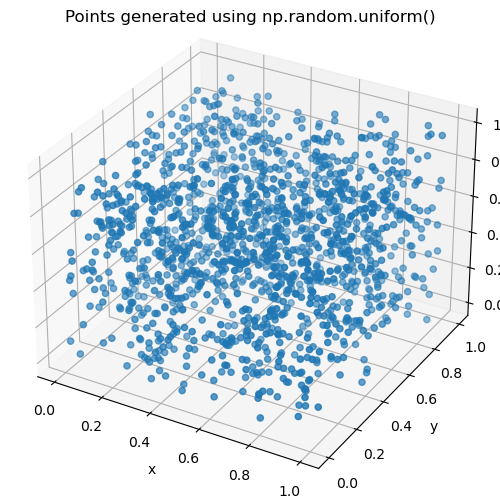

<IPython.core.display.Javascript object>


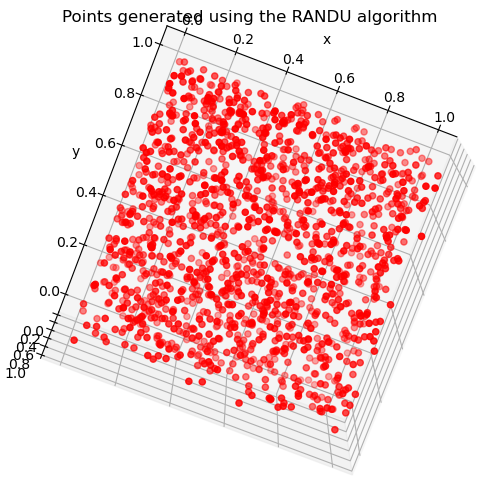

In [142]:
# allow rotation of 3D figures
%matplotlib notebook

# generating the random (x,y,z) points
points = random_xyz(1500)
# setting the size of the figure
plt.rcParams['figure.figsize'] = (5,5)
# creating figure
fig = plt.figure()
unif = Axes3D(fig)
unif.scatter(points[0], points[1], points[2])

fig.suptitle('Points generated using np.random.uniform()')
# labelling the axis
unif.set_xlabel('x')
unif.set_ylabel('y')
unif.set_zlabel('z')

plt.show()

# repeating the process for the RANDU algorithm
k = randssp(3, 1500)

fig = plt.figure()

randu = Axes3D(fig)

randu.scatter(k[0, :], k[1, :], k[2, :], color='r')

fig.suptitle('Points generated using the RANDU algorithm')
randu.set_xlabel('x')
randu.set_ylabel('y')
randu.set_zlabel('z')

plt.show()

The rotating plots allow us to see how, in the case of the points generated using the RANDU algorithm, when the figure is in a particular position (partially diagonal and almost parallel to the xy plane), the points arrange into a sequence on planes parallel to one another. These are the hyperplanes mentioned in Marsaglias' theorem. The RANDU algorithm clearly does not pass the spectral test. <br>
On the other hand, when studying the points generated with np.random.uniform(), no matter the way the figure is rotated, no planes can be observed. Thus, this random number generater passes the spectral test, showing that 3D points can be produced without correlation between them.

### Non-Uniform Distributions

The objective of this Monte Carlo simulation is to recreate the penetration of thermal neutrons through a slab of a given material and thickness. <br>
The behaviour of neutrons piercing a slab of shielding does not follow a uniform distribution, but is ruled by an exponential distrution instead. Specifically, the intensity of a beam of neutrons through a slab is shielding is given by:
$$ I \propto e^{-x/\lambda}$$
where $x$ is the penetration within the slab and $\lambda$ is the mean free path of the neutron, which is the average distance that a neutron can travel within the slab before interacting. The mean free path depends on the properties of the material, and, for neutrons only experiencing scattering and absorption, it can be calculated as:
$$ \lambda = \frac{1}{\sigma_T}, \qquad \sigma_T = n(\sigma_a+\sigma_s), \qquad n = \frac{\rho N_A}{M}$$
where $\sigma_i$ is the cross-section of a certain event, $\rho$ is the density of the material, $N_A$ is Avogadro's number and $M$ is the molar mass of the material. <br>

There are several methods to generate non-uniformly-distributed samples from uniform random number generators, such as the central limit or Box-Müller transformation for Gaussians, or the von Neumann Rejection method for other distributions. Given the simplicty of the expression for the exponential distribution, the method that will be used is inverse distribution sampling. This method only requiress the calculation of the inverse cumulative distribution function and a uniformly-distributed variable to generate a desired distribution. For the exponential distribution given above:
$$ \text{pdf}(x) = e^{-x/\lambda} \qquad \text{cdf}(x) = \int_{0}^{x}\text{pdf}(x) = \frac{1-e^{-x/\lambda}}{\lambda} \qquad \text{cdf}^{-1} = -\lambda \log(1-z)$$
Given a uniformly distributed (over (0,1)) variable $u_i$, $1-u_i$ will also be uniformly distributed and so, from a uniformly distributed variable $u_i$, an exponentially-distributed variable can be obtained by:
$$ x_i = -\lambda \log(u_i)$$

In [101]:
def exponential(n, rho, M, sigma_ab, sigma_scat):
    # samples with an exponential distribution of the form exp(-x/mf_path)
    # calculating mean free path
    N_A = 6.022e23 # Avogadro's number
    mf_path = M / (rho * N_A * (sigma_ab + sigma_scat))
    # array to store the values
    x = np.zeros(n)
    for i in range(n):
        # generating the numbers
        x[i] = -mf_path * np.log(np.random.uniform())

    return x

Such a random number generator can be used to obtain the value of the characteristic attenuation length for water in the absence of scattering. For this case (and only for the case where only absorption is considered), the characteristic attenuation length should match the mean free path of a neutron in water.

<IPython.core.display.Javascript object>


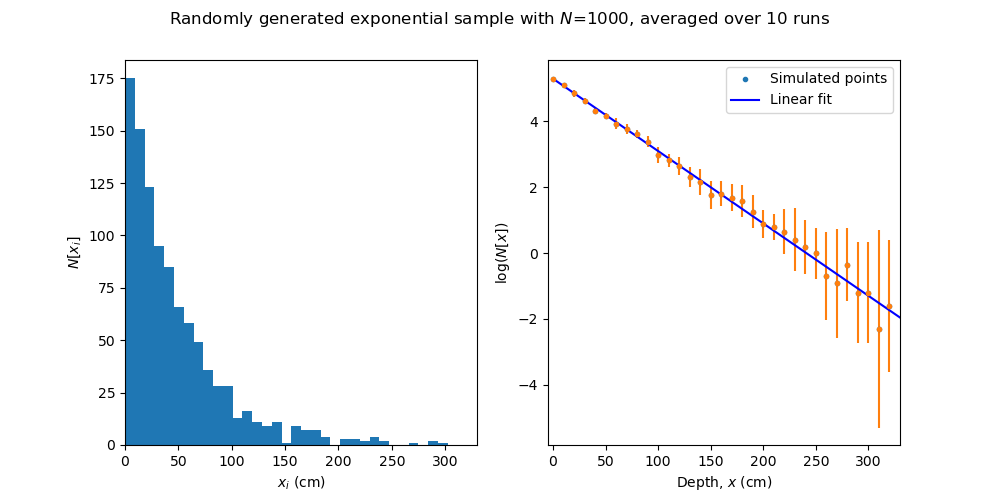

For 1000 samples, the linear fit gives a value for the characteristic attenuation length  of water in absence of scattering of 45.4623 +/- 0.0004 cm.


In [159]:
# physical parameters of a slab of water
M_water = 18.01528 # g/mol
rho_water = 1 # g/cm^3
abs_water = 0.6652e-24 # cm^2 
scat_water = 103e-24
# fixing the number of samples
n_samples = 1000
# times the sample will be produced, for statistical purposes
n_runs = 10
# number of desired bins for the histogram; each bin covers 10cm
n_bins = 33
# arrays to store the averages and standard deviations of the exponentially-distributed generated values
# the numbers generated in each run are on the same row
avg_particles = np.zeros((n_runs, n_bins))
avg_depth = np.zeros((n_runs, n_bins))

for run in range(n_runs):
    # in absence of scattering
    ay = exponential(n_samples, rho_water, M_water, abs_water, 0)
    # creating the histogram
    particles, depth = np.histogram(ay, bins=n_bins, range=(0,330))
    avg_particles[run,:] = particles
    # the depth array is one unit longer than the particles one
    # the last limit of the bin is not really needed
    avg_depth[run,:] = depth[:-1]

std_particles = np.std(avg_particles, axis=0)
avg_particles = np.average(avg_particles, axis=0)
std_depth = np.std(avg_depth, axis=0)
avg_depth = np.average(avg_depth, axis=0)

# getting rid of the data points with particle number equal to zero to be able to take the logarithm later
particles_nz = [avg_particles[i] for i in range(len(avg_particles)) if avg_particles[i] != 0]
depth_nz = [avg_depth[i] for i in range(len(avg_depth)) if avg_particles[i] != 0]
std_particles = [std_particles[i] for i in range(len(std_particles)) if avg_particles[i] != 0]
std_depth = [std_depth[i] for i in range(len(std_depth)) if avg_particles[i] != 0]

# fitting linearly the logarithm of the number of particles against the depth reached
coef, err = np.polyfit(depth_nz,np.log(particles_nz), 1, cov=True)

plt.rcParams['figure.figsize'] = (10,5)
# plotting the histogram
fig, (hist, fit) = plt.subplots(1,2)
fig.suptitle(f'Randomly generated exponential sample with $N$={n_samples}, averaged over {n_runs} runs')
hist.hist(ay, bins=33)
hist.set(xlabel='$x_i$ (cm)')
hist.set(ylabel='$N[x_i]$')
hist.set_xlim(0,330)

# plotting the linear fit along with the generated data points, with error bars
fit.plot(depth_nz, np.log(particles_nz), '.')
fit.plot(np.arange(0,400,0.1), coef[0]*np.arange(0,400,0.1)+coef[1], 'b')
fit.set(xlabel='Depth, $x$ (cm)')
fit.set(ylabel='log($N[x]$)')
fit.set_xlim(-5,330)
fit.errorbar(depth_nz, np.log(particles_nz), xerr=std_depth, yerr=np.divide(std_particles, particles_nz), fmt='.')
fit.legend(['Simulated points', 'Linear fit'])
plt.show()

print(f'For {n_samples:} samples, the linear fit gives a value for the characteristic attenuation length '
      f' of water in absence of scattering of {-1/coef[0]:.04f} +/- {math.sqrt(err[0][0]):.04f} cm.')

While the mean free path calculated using the parameters given to the exponential distribution generator is about $\lambda = 44.973 \;\text{cm}$, the fit to the exponentially-distributed sample gives values close to 45 cm, but which could go as far from it as 43 cm or 47 cm, depending on the run. This is due to the points found at high values of penetration depth. These values, which as can be seen from the plot have very high uncertainties, have a very low probability compared to those at low penetration depths. As can be seen on the histogram, this causes the distribution to not adhere as much to an ideal exponential distribution. The sole cause of this is the finite sample size: we are trying to recreate a continuous exponential distribution through a discrete and finite sample size, and so this deviations from the ideal case are bound to happen given the randomness of the process. Increasing the sample size should provide a more accurate value of the characteristic attenuation length.

When scattering inside the slab is taken into account, it is necessary to simulate the actual movement of neutrons, which can scatter against the atoms and change directions completely. To do so, having a reliable way to generate isotropic vectors uniformly distributed over a sphere is a first step. These isotropic vectors can be produced by generating uniformly distributed points in spherical coordinates, with a constant radius, and then transforming them into Cartesian coordinates:
$$ r = \text{constant}$$
$$ x_i = r\sin(\theta_i)\cos(\varphi_i)$$
$$ y_i = r\sin(\theta_i)\sin(\varphi_i)$$
$$ x_i = r\cos(\theta_i)$$
$$ 0 < \theta_i < \pi$$
$$ 0 < \varphi_i < 2\pi $$

However, it is important to note that, were $\theta_i$ to be sampled as a uniformly distributed variable, the isotropic vectors would concentrate over the poles of the sphere. To avoid this, $\theta_i$ must be sampled as follows:
$$ \theta_i = cos^{-1}(1-2u_i)$$
where $u_i$ is a uniformly distributed variable over (0,1). <br>
A set of 3D points will be generated in this way and its isotropic uniformity will be checked by plotting it.

In [160]:
def isotropic_vector():
    # acos(1-2u) is used to avoid accumulation of points on the poles of the sphere
    theta = math.acos(1-2*np.random.uniform())
    phi = 2*math.pi * np.random.uniform()
    # transforming from spherical to Cartesian coordinates
    # the points are over the unit sphere r=1
    x = math.sin(theta) * math.cos(phi)
    y = math.sin(theta) * math.sin(phi)
    z = math.cos(theta)
    return (x, y, z)

<IPython.core.display.Javascript object>


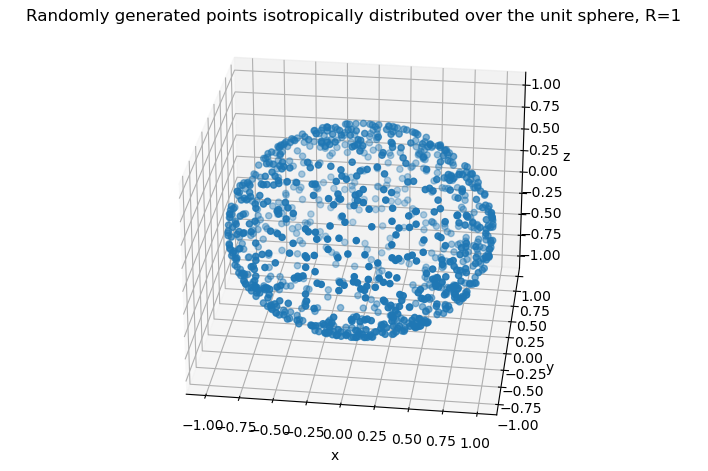

In [161]:
get_ipython().magic('matplotlib notebook')
# generating 1000 points uniformly distributed over the sphere
n = 1000 
# arrays to store the coordinates
ax = np.zeros(n)
ay = np.zeros(n)
az = np.zeros(n)
for i in range(n):
    # generating the points one by one
    x,y,z = isotropic_vector()
    
    ax[i] = x
    ay[i] = y
    az[i] = z

# plotting the points on a 3D interactive figure
plt.rcParams['figure.figsize'] = (5,5)
fig = plt.figure()
spherical = Axes3D(fig)

spherical.scatter(ax, ay, az)
# axis labels
spherical.set_xlabel('x')
spherical.set_ylabel('y')
spherical.set_zlabel('z')
# title
fig.suptitle('Randomly generated points isotropically distributed over the unit sphere, R=1')

plt.show()

As can be seen from the 3D figure, the points do not seem to concentrate on the poles of the sphere, but are uniformly distributed over the surface of the sphere, although with slight fluctuations due to the random nature of the generating process.

The last detail necessary to fully simulate the movement of the neutron inside the slab is to twitch the length of each isotropic vector generated: a neutron does not always advance the same distance inside the slab, instead the distance it advances is given by an exponential distribution. The mean free path in the exponent should now include both scattering and absorption events.

In [162]:
def exponential_step(rho, M, sigma_abs, sigma_scat):
    # the length of the step is exponentially distributed according to exp(-x/mean_free_path)
    length = exponential(1, rho, M, sigma_abs, sigma_scat)
    # the direction of the
    return [length[0]*x for x in isotropic_vector()]

## Normal incidence of neutrons on a slab of fixed thickness

All the random number generators, as well as all methods necessary for the simulation of the neutron inside the slab, have been checked. It is time to actually start simulating a beam of neutrons piercing the different shieldings. <br>
In this first part, three beams of thermal neutrons of the same intensity will be launched at slabs of thickness $T=10\;\text{cm}$ made of three different materials: water, lead and graphite. The slabs are assumed to be infinite in the plane perpendicular to the incidence of the beam of neutrons. <br>
The fractions of reflected, absorbed and transmitted neutrons will be studied for all three materials.

In [167]:
# setting all physical parameters for every material
# in g/cm^3, g/mol, cm^2, cm^2, respectively
rho_water, M_water, abs_water, scat_water = 1, 18.01528, 0.6652e-24, 103.0e-24
rho_lead, M_lead, abs_lead, scat_lead = 11.35, 207.21, 0.158e-24, 11.221e-24
rho_grap, M_grap, abs_grap, scat_grap = 1.67, 12.0107, 0.0045e-24, 4.74e-24

# fixed thickness of the slab
T = 10
# number of neutrons launched at the slab
N = 1000
#number of times the simulation will run, for statistical purposes
sims = 10

In [168]:
# Lists where the number of transmitted, absorbed and reflected neutrons will be stored
list_trans = np.zeros(sims)
list_abs = np.zeros(sims)
list_ref = np.zeros(sims)
# setting the parameters for water
rho, M, sigma_abs, sigma_scat = rho_water, M_water, abs_water, scat_water
# the probability of absorption
P_abs = sigma_abs / (sigma_abs + sigma_scat)

# the simulation is run several times for the sake of statistical and error analysis
for run in range(sims):
    # Reinitializing number of transmitted, absorbed and reflected neutron before each round of simulations
    N_t = 0
    N_a = 0
    N_r = 0
    # simulating each neutron individually
    for k in range(N):
        # initial position at the start of the slab
        x = 0
        #counting variable
        i = 0
        # flag variable to mark when the neutron is absorbed
        is_absorbed = 0
        # continues as long as the neutron is inside the slab or hasn't been absorbed
        while (0 <= x < T) and (is_absorbed == 0):
            if i == 0:
                # the first step into the slab is purely horizontal
                length = exponential(1, rho, M, sigma_abs, sigma_scat)
                x += length[0]
            else:
                # all other steps are isotropic but of exponentially-distributed length
                step_x = exponential_step(rho, M, sigma_abs, sigma_scat)[0]
                x += step_x
            i += 1
            # checking whether the neutron is absorbed after every step
            if np.random.uniform() < P_abs:
                is_absorbed = 1

        if x < 0:
            # if the final position is negative the neutron has been deflected
            N_r += 1
        elif 0 <= x <= T:
            # if the final position is inside the slab, the neutron was absorbed
            N_a += 1
        elif T < x:
            #if the final position is after the slab the neutron has been transmitted
            N_t += 1
    # sotring the number of transmitted, absorbed and reflected neutrons
    list_trans[run] = N_t
    list_abs[run] = N_a
    list_ref[run] = N_r

# average and standard deviations of each group of neutrons
N_r = np.average(list_ref)
err_r = np.std(list_ref)
N_a = np.average(list_abs)
err_a = np.std(list_abs)
N_t = np.average(list_trans)
err_t = np.std(list_trans)

# the information is printed on the screen in the format of a table, showing all important values
# with uncertainty, when pertinent
# f-strings are used to format the numbers and control how many decimals are shown
# as well as for making the table more readable
table = [['Thickness', f'{T:.2f} cm'],
         ['Total neutrons:', N],
         ['Reflected:', f'{N_r:.1f} +/- {err_r:.1f}'],
         ['Absorbed:', f'{N_a:.1f} +/- {err_a:.1f}'],
         ['Transmitted:', f'{N_t:.1f} +/- {err_t:.1f}'],
         ['Fraction reflected:', f'({N_r/N*100:.2f} +/- {err_r/N*100:.2f})%'],
         ['Fraction absorbed:', f'({N_a/N*100:.2f} +/- {err_a/N*100:.2f})%'],
         ['Fraction transmitted:', f'({N_t/N*100:.2f} +/- {err_t/N*100:.2f})%']]

print('{:-<46}'.format(''))
print('Transmission Through a Fixed Thickness - Water')
print('{:-<46}'.format(''))
for item in table:
    print('{:<24} {:>}'.format(item[0], item[1]))

----------------------------------------------
Transmission Through a Fixed Thickness - Water
----------------------------------------------
Thickness                10.00 cm
Total neutrons:          1000
Reflected:               786.6 +/- 14.0
Absorbed:                210.4 +/- 13.1
Transmitted:             3.0 +/- 1.7
Fraction reflected:      (78.66 +/- 1.40)%
Fraction absorbed:       (21.04 +/- 1.31)%
Fraction transmitted:    (0.30 +/- 0.17)%


In [171]:
# setting the parameters for lead
rho, M, sigma_abs, sigma_scat = rho_lead, M_lead, abs_lead, scat_lead
# the probability of absorption
P_abs = sigma_abs / (sigma_abs + sigma_scat)

# the process is repeated exactly as before for lead
for run in range(sims):
    N_t = 0
    N_a = 0
    N_r = 0
    
    for k in range(N):
        x = 0
        i = 0
        is_absorbed = 0
        while (0 <= x < T) and (is_absorbed == 0):
            if i == 0:
                length = exponential(1, rho, M, sigma_abs, sigma_scat)
                x = length[0]
            else:
                step_x = exponential_step(rho, M, sigma_abs, sigma_scat)[0]
                x += step_x
            i += 1
            if np.random.uniform() < P_abs:
                is_absorbed = 1
                
        if x < 0:
            N_r += 1
        elif 0 <= x <= T:
            N_a += 1
        elif T < x:
            N_t += 1
            
    # the lists were created for water and the values are simply overwritten for lead, and graphite later
    list_trans[run] = N_t
    list_abs[run] = N_a
    list_ref[run] = N_r

# same thing for the averages and standard deviations
N_r = np.average(list_ref)
err_r = np.std(list_ref)
N_a = np.average(list_abs)
err_a = np.std(list_abs)
N_t = np.average(list_trans)
err_t = np.std(list_trans)

# the same table format as before is used to summarise information of the simulation
table = [['Thickness:', f'{T:.2f} cm'],
         ['Total neutrons:', N],
         ['Reflected:', f'{N_r:.1f} +/- {err_r:.1f}'],
         ['Absorbed:', f'{N_a:.1f} +/- {err_a:.1f}'],
         ['Transmitted:', f'{N_t:.1f} +/- {err_t:.1f}'],
         ['Fraction reflected:', f'({N_r/N*100:.2f} +/- {err_r/N*100:.2f})%'],
         ['Fraction absorbed:', f'({N_a/N*100:.2f} +/- {err_a/N*100:.2f})%'],
         ['Fraction transmitted:', f'({N_t/N*100:.2f} +/- {err_t/N*100:.2f})%']]

print('{:-<46}'.format(''))
print('Transmission Through a Fixed Thickness - Lead')
print('{:-<46}'.format(''))
for item in table:
    print('{:<24} {:>}'.format(item[0], item[1]))

----------------------------------------------
Transmission Through a Fixed Thickness - Lead
----------------------------------------------
Thickness:               10.00 cm
Total neutrons:          1000
Reflected:               613.0 +/- 17.0
Absorbed:                98.2 +/- 10.1
Transmitted:             288.8 +/- 16.4
Fraction reflected:      (61.30 +/- 1.70)%
Fraction absorbed:       (9.82 +/- 1.01)%
Fraction transmitted:    (28.88 +/- 1.64)%


In [170]:
# setting the parameters for graphite
rho, M, sigma_abs, sigma_scat = rho_grap, M_grap, abs_grap, scat_grap
# the probability of absorption
P_abs = sigma_abs / (sigma_abs + sigma_scat)

# repeating the same process once again
for run in range(sims):
    N_t = 0
    N_a = 0
    N_r = 0

    for k in range(N):
        x = 0
        i = 0
        is_absorbed = 0
        while (0 <= x < T) and (is_absorbed == 0):
            if i == 0:
                length = exponential(1, rho, M, sigma_abs, sigma_scat)
                x = length[0]
            else:
                step_x, step_y, step_z = exponential_step(rho, M, sigma_abs, sigma_scat)
                x += step_x
            i += 1
            if np.random.uniform() < P_abs:
                is_absorbed = 1

        if x < 0:
            N_r += 1
        elif 0 <= x <= T:
            N_a += 1
        elif T < x:
            N_t += 1
    
    list_trans[run] = N_t
    list_abs[run] = N_a
    list_ref[run] = N_r

N_r = np.average(list_ref)
err_r = np.std(list_ref)
N_a = np.average(list_abs)
err_a = np.std(list_abs)
N_t = np.average(list_trans)
err_t = np.std(list_trans)

table = [['Thickness:', f'{T:.2f} cm'],
         ['Total neutrons:', N],
         ['Reflected:', f'{N_r:.1f} +/- {err_r:.1f}'],
         ['Absorbed:', f'{N_a:.1f} +/- {err_a:.1f}'],
         ['Transmitted:', f'{N_t:.1f} +/- {err_t:.1f}'],
         ['Fraction reflected:', f'({N_r/N*100:.2f} +/- {err_r/N*100:.2f})%'],
         ['Fraction absorbed:', f'({N_a/N*100:.2f} +/- {err_a/N*100:.2f})%'],
         ['Fraction transmitted:', f'({N_t/N*100:.2f} +/- {err_t/N*100:.2f})%']]

print('{:-<50}'.format(''))
print('Transmission Through a Fixed Thickness - Graphite')
print('{:-<50}'.format(''))
for item in table:
    print('{:<24} {:>}'.format(item[0], item[1]))

--------------------------------------------------
Transmission Through a Fixed Thickness - Graphite
--------------------------------------------------
Thickness:               10.00 cm
Total neutrons:          1000
Reflected:               687.4 +/- 11.3
Absorbed:                8.4 +/- 2.0
Transmitted:             304.2 +/- 11.3
Fraction reflected:      (68.74 +/- 1.13)%
Fraction absorbed:       (0.84 +/- 0.20)%
Fraction transmitted:    (30.42 +/- 1.13)%


The simulation shows that in water around 80% of the neutrons are backscattered, around 20% of them are absorbed by the slab and a negligible fraction of them are able to transmit through the slab. For lead, the simulation shows approximately 60% reflection, 10% absorption and 20% transmission. Finally, for graphite, the simulation shows about a 70% of neutrons would backscatter while around 30% would cross the slab, with a negligible fraction of them being absorbed by the slab. <br>
Considering all of these, of all three materials considered, water would be the best one to use in a situation where shielding of neutrons would be needed, as it shows both the smallest transmission by far and the highest absorption.

### Variation of the error with number of simulated neutrons

Just like we have observed when discussing random number generator in the first section, the sample number, or in this case the number of simulated neutrons, can affect the error and uncertainty in the simulation. This second part of the simulation will study precisely how error varies with the number of simulated neutrons. <br>
More specifically, the relative error on the number of reflected, absorbed and tranmitted errors will be computed for different amounts of simulated neutrons. The relative error will be studied, rather than the absolute one, to ease the comparison between the different cases. For this reason only the slab made out of lead will be considered, as it was the only material that showed high enough fractions of all three groups of neutrons to avoid obtaining any null values, even for smaller numbers of simulated neutrons. Since the simulation method used is the same for all three materials, it will be acceptable to extend the qualitative results obtained from simulating lead to the other two.

In [174]:
# list with the several amounts of neutrons that the simulation will run
n_neutrons = [100, 1000, 2000, 5000, 10000]
# number of repetition of the simulation for statistical purposes
sims = 10
# lists where the relative errors for transmitted, absorbed and reflected neutrons of every round will be stored
list_err_trans = np.zeros(len(n_neutrons))
list_err_abs = np.zeros(len(n_neutrons))
list_err_ref = np.zeros(len(n_neutrons))
# resetting the parameters for lead
rho, M, sigma_abs, sigma_scat = rho_lead, M_lead, abs_lead, scat_lead 
# the probability of absorption
P_abs = sigma_abs / (sigma_abs + sigma_scat)

# rerunning every round of simulations for each number of simulated neutrons
for n in range(len(n_neutrons)):
    # reinitializing the storage of the number of transmitted, absorbed and reflected neutrons
    # for each number of simulated neutrons
    list_trans = np.zeros(sims)
    list_abs = np.zeros(sims)
    list_ref = np.zeros(sims)
    
    for run in range(sims):
        N_t = 0
        N_a = 0
        N_r = 0
        for k in range(n_neutrons[n]):
            x = 0
            i = 0
            is_absorbed = 0
            
            while (0 <= x < T) and (is_absorbed == 0):
                if i == 0:
                    length = exponential(1, rho, M, sigma_abs, sigma_scat)
                    x = length[0]
                else:
                    step_x = exponential_step(rho, M, sigma_abs, sigma_scat)[0]
                    x += step_x
                if np.random.uniform() < P_abs:
                    is_absorbed = 1
                i += 1
            
            if x < 0:
                N_r += 1
            elif 0 <= x <= T:
                N_a += 1
            elif T < x:
                N_t += 1
        
        
        list_trans[run] = N_t
        list_abs[run] = N_a
        list_ref[run] = N_r
    
    
    N_r = np.average(list_ref)
    err_r = np.std(list_ref)
    N_a = np.average(list_abs)
    err_a = np.std(list_abs)
    N_t = np.average(list_trans)
    err_t = np.std(list_trans)
    # relative errors are stored, as absolute ones are harder to compare for different neutron numbers
    list_err_ref[n] = err_r/N_r
    list_err_abs[n] = err_a/N_a
    list_err_trans[n] = err_t/N_t

# the information is once again shown in a table
# the np.ndarrays have to be transformed to lists in order to join them with a normal python list
table = [['# of neutrons']+n_neutrons,
         ['Reflected ']+ list_err_ref.tolist(),
         ['Absorbed  ']+ list_err_abs.tolist(),
         ['Transmitted ']+list_err_trans.tolist()]

print('{:-<76}'.format(''))
print(f'{"Variation of the relative error with number of simulated neutrons for lead":}')
print('{:-<76}'.format(''))
line = table[0]
print(f'{line[0]:<20} {line[1]:>9} {line[2]:>9} {line[3]:>9} {line[4]:>9} {line[5]:>9}')
for line in table[1:]:
    # the relative errors are shown in percentage
    print(f'{line[0]:<20} {line[1]*100:>8.03f}% {line[2]*100:>8.03f}% {line[3]*100:>8.03f}% {line[4]*100:>8.03f}% {line[5]*100:>8.03f}%')

----------------------------------------------------------------------------
Variation of the relative error with number of simulated neutrons for lead
----------------------------------------------------------------------------
# of neutrons              100      1000      2000      5000     10000
Reflected               5.921%    1.874%    1.922%    1.015%    0.784%
Absorbed               31.346%   10.438%    4.722%    5.230%    4.746%
Transmitted            19.100%    2.541%    3.614%    2.815%    1.251%


As has been the case before, and was expected, the simulated data seen on the table shows how as you increase the number of simulated neutrons, the error on the number of reflected, absorbed and transmitted neutrons reduces greatly, going from as high as about 20% for the transmitted neutrons when simulating 100 neutrons to about 1% when simulating 10000 neutrons. This can be explained through the Law of Large Numbers: as the same event is repeated more and more times, the obtained values approach the expected values, and so the standard variation, which we treat as the error due to the binomial distribution, becomes smaller. <br>
The variation in the error with the number of simulated neutrons holds especially true for the number of absorbed neutrons, which tend to show the highest relative error for any number of simulated neutrons. This is due to the fact that, as was shown in the earlier simulations, absorbed neutrons form the smaller fraction of neutrons in lead, and so they are the most sensitive to the expected fluctuations branching from a finite randomly-generated sequence of numbers.

## Variation with slab thickness

In this final part, the Monte Carlo simulation will be used to obtain a physical parameter whose analytical value cannot be obtained, proving how useful this type of simulations can be: the characteristic attenuation length considering both absorption and scattering inside the slab. To do so, the same number of neutrons will be simulated to pierce through several slabs of different thickness of each material. The number of reflected, absorbed and transmitted neutrons will be computed for each thickness and for each material. Then, since
$$ N_{trans} \propto e^{-x/\lambda}, \qquad \log(N_{trans}) \propto \frac{-1}{\lambda} \cdot x$$
with $\lambda$ the characteristic attenuation length, a fit of the logarithm of the number of transmitted neutrons against the thickness of the slab can be realised for each material, thus obtaining a value for the characteristic attenuation length.

In [179]:
# list of thicknesses that the simulation will run
# 20 values over the range of 1 to 20cm, spaced logarithmically
thickness = np.geomspace(1, 20, num=20)
# number of neutrons launched at the slab
n_neutrons = 1000
# number of rounds of simulation, for statistical purposes
sims = 10

In [175]:
# Lists where the averages and errors for transmitted, absorbed and reflected neutrons of every round will be stored
# for water
water_trans = np.zeros(len(thickness))
water_err_trans = np.zeros(len(thickness))
water_abs = np.zeros(len(thickness))
water_err_abs = np.zeros(len(thickness))
water_ref = np.zeros(len(thickness))
water_err_ref = np.zeros(len(thickness))

# resetting the physical parameters for water
rho, M, sigma_abs, sigma_scat = rho_water, M_water, abs_water, scat_water
# the probability of absorption
P_abs = sigma_abs / (sigma_abs + sigma_scat)

# rerunning every round of simulations for each different thickness of the slab
for slab in range(len(thickness)):
    T = thickness[slab]
    list_trans = np.zeros(sims)
    list_abs = np.zeros(sims)
    list_ref = np.zeros(sims)
    
    for run in range(sims):
        N_t = 0
        N_a = 0
        N_r = 0

        for k in range(n_neutrons):
            x = 0
            i = 0
            is_absorbed = 0
            
            while (0 <= x < T) and (is_absorbed == 0):
                if i == 0:
                    length = exponential(1, rho, M, sigma_abs, sigma_scat)
                    x += length[0]
                else:
                    step_x = exponential_step(rho, M, sigma_abs, sigma_scat)[0]
                    x += step_x
                i += 1
                if np.random.uniform() < P_abs:
                    is_absorbed = 1

            if x < 0:
                N_r += 1
            elif x <= T:
                N_a += 1
            elif T < x:
                N_t += 1

        list_trans[run] = N_t
        list_abs[run] = N_a
        list_ref[run] = N_r
    
    # the average and standard deviations for each thickness are stored
    water_ref[slab] = np.average(list_ref)
    water_err_ref[slab] = np.std(list_ref)
    
    water_abs[slab] = np.average(list_abs)
    water_err_abs[slab] = np.std(list_abs)
    
    water_trans[slab] = np.average(list_trans)
    water_err_trans[slab] = np.std(list_trans)

In [176]:
# Lists where the averages and errors for transmitted, absorbed and reflected neutrons of every round will be stored
# for lead
lead_trans = np.zeros(len(thickness))
lead_err_trans = np.zeros(len(thickness))
lead_abs = np.zeros(len(thickness))
lead_err_abs = np.zeros(len(thickness))
lead_ref = np.zeros(len(thickness))
lead_err_ref = np.zeros(len(thickness))

# resetting the physical parameters for lead
rho, M, sigma_abs, sigma_scat = rho_lead, M_lead, abs_lead, scat_lead
# the probability of absorption
P_abs = sigma_abs / (sigma_abs + sigma_scat)

# the same process is repeated for lead
for slab in range(len(thickness)):
    T = thickness[slab]
    list_trans = np.zeros(sims)
    list_abs = np.zeros(sims)
    list_ref = np.zeros(sims)
    
    for run in range(sims):
        N_t = 0
        N_a = 0
        N_r = 0

        for k in range(n_neutrons):
            x = 0
            i = 0
            is_absorbed = 0

            while (0 <= x < T) and (is_absorbed == 0):
                if i == 0:
                    length = exponential(1, rho, M, sigma_abs, sigma_scat)
                    x += length[0]
                else:
                    step_x = exponential_step(rho, M, sigma_abs, sigma_scat)[0]
                    x += step_x
                i += 1
                if np.random.uniform() < P_abs:
                    is_absorbed = 1

            if x < 0:
                N_r += 1
            elif x <= T:
                N_a += 1
            elif T < x:
                N_t += 1

        list_trans[run] = N_t
        list_abs[run] = N_a
        list_ref[run] = N_r
    
    
    lead_ref[slab] = np.average(list_ref)
    lead_err_ref[slab] = np.std(list_ref)
    
    lead_abs[slab] = np.average(list_abs)
    lead_err_abs[slab] = np.std(list_abs)
    
    lead_trans[slab] = np.average(list_trans)
    lead_err_trans[slab] = np.std(list_trans)

In [177]:
# Lists where the averages and errors for transmitted, absorbed and reflected neutrons of every round will be stored
# for graphite
grap_trans = np.zeros(len(thickness))
grap_err_trans = np.zeros(len(thickness))
grap_abs = np.zeros(len(thickness))
grap_err_abs = np.zeros(len(thickness))
grap_ref = np.zeros(len(thickness))
grap_err_ref = np.zeros(len(thickness))

# resetting the physical parameters for graphite
rho, M, sigma_abs, sigma_scat = rho_grap, M_grap, abs_grap, scat_grap
# the probability of absorption
P_abs = sigma_abs / (sigma_abs + sigma_scat)

# repeating once again for graphite
for slab in range(len(thickness)):
    T = thickness[slab]
    list_trans = np.zeros(sims)
    list_abs = np.zeros(sims)
    list_ref = np.zeros(sims)
    
    for run in range(sims):
        N_t = 0
        N_a = 0
        N_r = 0
        
        for k in range(n_neutrons):
            x = 0
            i = 0
            is_absorbed = 0
            while (0 <= x < T) and (is_absorbed == 0):
                if i == 0:
                    length = exponential(1, rho, M, sigma_abs, sigma_scat)
                    x += length[0]
                else:
                    step_x = exponential_step(rho, M, sigma_abs, sigma_scat)[0]
                    x += step_x
                i += 1
                if np.random.uniform() < P_abs:
                    is_absorbed = 1

            if x < 0:
                N_r += 1
            elif x <= T:
                N_a += 1
            elif T < x:
                N_t += 1

        list_trans[run] = N_t
        list_abs[run] = N_a
        list_ref[run] = N_r
    
    
    grap_ref[slab] = np.average(list_ref)
    grap_err_ref[slab] = np.std(list_ref)
    
    grap_abs[slab] = np.average(list_abs)
    grap_err_abs[slab] = np.std(list_abs)
    
    grap_trans[slab] = np.average(list_trans)
    grap_err_trans[slab] = np.std(list_trans)

Representing the data obtained from the all the simulations for every material and thickness:

In [184]:
# a table with the different data for each material is printed on screen
#for water
print('{:-<100}'.format(''))
print('Reflection, absorption and transmission for different thicknesses in water, lead and graphite')
print('{:-<100}'.format(''))
print(f'{"Water":^65}')
print('{:-<100}'.format(''))
print(f'{"Thickness (cm)":<11} {"Reflected":^18} {"Absorbed":^18} {"Transmitted":^18}')
for i in range(len(thickness)):
    w_ref = f'{water_ref[i]:.1f} +/- {water_err_ref[i]:.1f}'
    w_abs = f'{water_abs[i]:.1f} +/- {water_err_abs[i]:.1f}'
    w_trans = f'{water_trans[i]:.1f} +/- {water_err_trans[i]:.1f}'
    
    print(f'{thickness[i]:<11.1f} {w_ref:>18} {w_abs:>18} {w_trans:>18}')

# for lead
print('{:-<100}'.format(''))
print(f'{"Lead":^65}')
print('{:-<100}'.format(''))    
print(f'{"Thickness (cm)":<11} {"Reflected":^18} {"Absorbed":^18} {"Transmitted":^18}')
for i in range(len(thickness)):
    l_ref = f'{lead_ref[i]:.1f} +/- {lead_err_ref[i]:.1f}'
    l_abs = f'{lead_abs[i]:.1f} +/- {lead_err_abs[i]:.1f}'
    l_trans = f'{lead_trans[i]:.1f} +/- {lead_err_trans[i]:.1f}'
    
    print(f'{thickness[i]:<11.1f} {l_ref:>18} {l_abs:>18} {l_trans:>18}')
    
# for graphite
print('{:-<100}'.format(''))
print(f'{"Graphite":^65}')
print('{:-<100}'.format(''))
print(f'{"Thickness (cm)":<11} {"Reflected":^18} {"Absorbed":^18} {"Transmitted":^18}')
for i in range(len(thickness)):
    g_ref = f'{grap_ref[i]:.1f} +/- {grap_err_ref[i]:.1f}'
    g_abs = f'{grap_abs[i]:.1f} +/- {grap_err_abs[i]:.1f}'
    g_trans = f'{grap_trans[i]:.1f} +/- {grap_err_trans[i]:.1f}'
    
    print(f'{thickness[i]:<11.1f} {g_ref:>18} {g_abs:>18} {g_trans:>18}')

----------------------------------------------------------------------------------------------------
Reflection, absorption and transmission for different thicknesses in water, lead and graphite
----------------------------------------------------------------------------------------------------
                              Water                              
----------------------------------------------------------------------------------------------------
Thickness (cm)     Reflected           Absorbed         Transmitted    
1.0             638.7 +/- 14.2       42.1 +/- 4.7     319.2 +/- 15.6
1.2             663.2 +/- 18.4       57.3 +/- 6.7     279.5 +/- 15.5
1.4             695.2 +/- 20.1       61.0 +/- 7.8     243.8 +/- 16.0
1.6             720.4 +/- 11.9       74.4 +/- 5.9      205.2 +/- 9.4
1.9             738.3 +/- 14.7       86.2 +/- 6.6     175.5 +/- 11.1
2.2              754.3 +/- 9.7       99.6 +/- 7.1      146.1 +/- 7.7
2.6             769.4 +/- 10.9     113.2 +/- 11.9  

Creating and plotting the linear fits of the logarithm of the number of transmitted neutrons against the thickness of the slabs for each material:

<IPython.core.display.Javascript object>


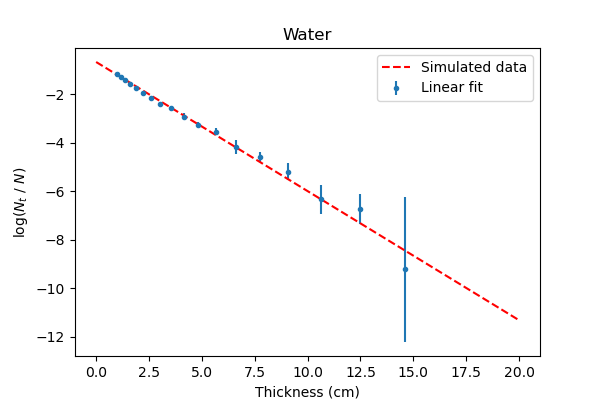

<IPython.core.display.Javascript object>


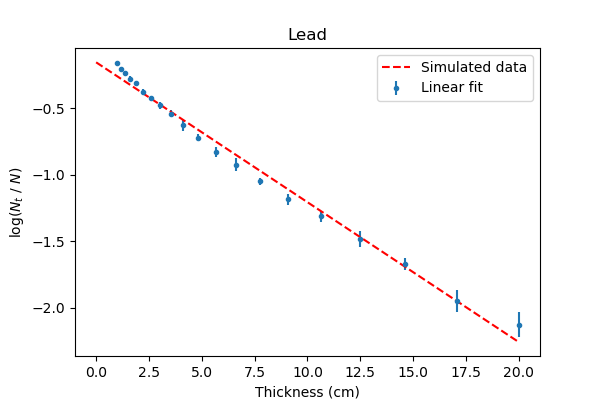

<IPython.core.display.Javascript object>


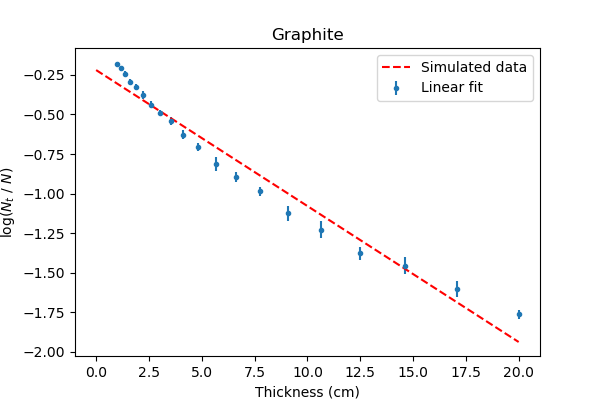

The linear fits give the following values for the characteristic attenuation lengths:
Water: 1.88 +/- 0.06 cm
Lead: 9.5 +/- 0.2 cm
Graphite: 11.6 +/- 0.5 cm


In [185]:
# the data points for which no neutrons where transmitted have to be eliminated
x_water = [thickness[i] for i in range(len(thickness)) if water_trans[i] != 0]
# the logarithm of the fraction of transmission is used for the fit rather than that of the number of transmitted neutrons
y_water = np.log([x/n_neutrons for x in water_trans if x != 0])
# the error has to be propagated, d(logx)=dx/x
err_y_water = [water_err_trans[i]/water_trans[i] for i in range(len(thickness)) if water_trans[i] != 0]
# generating the fit for water
# storing both the coefficients and the covariance matrix to calculate the uncertainty in the coefficients
water_fit, water_cov = np.polyfit(x_water, y_water, 1, cov=True)

# repeating the former steps for lead
x_lead = [thickness[i] for i in range(len(thickness)) if lead_trans[i] != 0]
y_lead = np.log([x/n_neutrons for x in lead_trans if x != 0])
err_y_lead = [lead_err_trans[i]/lead_trans[i] for i in range(len(thickness)) if lead_trans[i] != 0]
lead_fit, lead_cov = np.polyfit(x_lead, y_lead, 1, cov=True)

# repeating once again for graphite
x_grap = [thickness[i] for i in range(len(thickness)) if grap_trans[i] != 0]
y_grap = np.log([x/n_neutrons for x in grap_trans if x != 0])
err_y_grap = [grap_err_trans[i]/grap_trans[i] for i in range(len(thickness)) if grap_trans[i] != 0]
grap_fit, grap_cov = np.polyfit(x_grap, y_grap, 1, cov=True)

# generating an array to plot the fits
x = np.arange(0, 20, 0.01)

# setting figure size
plt.rcParams['figure.figsize'] = (6,4)
fig,(water) = plt.subplots(1,1)
# plotting error bars for the data points from the simulation
water.errorbar(x_water, y_water, yerr=err_y_water, fmt='.')
# axes labels
water.set(xlabel='Thickness (cm)')
water.set(ylabel='log($N_t$ / $N$)')
water.set_title('Water')
# plotting the fit along the data points
water.plot(x, water_fit[0]*x+water_fit[1], '--r')
# creating the legend
water.legend(['Simulated data', 'Linear fit'])

# repeating for lead
fig,(lead) = plt.subplots(1,1)
lead.errorbar(x_lead, y_lead, yerr=err_y_lead, fmt='.')
lead.set(xlabel='Thickness (cm)')
lead.set(ylabel='log($N_t$ / $N$)')
lead.set_title('Lead')
lead.plot(x, lead_fit[0]*x+lead_fit[1], '--r')
lead.legend(['Simulated data', 'Linear fit'])

# repeating for graphite
fig,(grap) = plt.subplots(1,1)
grap.errorbar(x_grap, y_grap, yerr=err_y_grap, fmt='.')
grap.set(xlabel='Thickness (cm)')
grap.set(ylabel='log($N_t$ / $N$)')
grap.set_title('Graphite')
grap.plot(x, grap_fit[0]*x+grap_fit[1], '--r')
grap.legend(['Simulated data', 'Linear fit'])

# showing the plots
plt.show()

# printing on screen the values obtained from the three linear fits
print('The linear fits give the following values for the characteristic attenuation lengths:')
print(f'Water: {-1/water_fit[0]:.2f} +/- {np.sqrt(water_cov[0][0])/water_fit[0]**2:.2f} cm')
print(f'Lead: {-1/lead_fit[0]:.1f} +/- {np.sqrt(lead_cov[0][0])/lead_fit[0]**2:.1f} cm')
print(f'Graphite: {-1/grap_fit[0]:.1f} +/- {np.sqrt(grap_cov[0][0])/grap_fit[0]**2:.1f} cm')

The Monte Carlo simulation carried out in this project shows that the characteristic attenuation length of water is around 1.9cm, the characteristic attenuation length of lead is approximately 9.5cm and the characteristic attenuation length of graphite is about 11.5cm. As has been mentioned before, this would make water the best material when it comes to shielding from thermal neutrons, as, on average, it is able to either deflect or absorb them before they completely go through the slab. <br>
One interesting thing to note from the plots is that the regression line that seems to fit the best for water, being the worst fit for graphite. That is, the bigger the characteristic attenuation length, the better the regression line fits the data. This is due to the reciprocal relation between the slope of the fit and the attenuation length, which causes small fluctuations to create more disruption for smaller $\lambda$. Another thing to note is a phenomenon that has been present in every single simulation carried out in this project: bigger errors for higher values of thickness. Once again, this is due to the fact that this value are more unlikely and thus more sensitive to random fluctuations; a bigger number of simulated neutrons would reduce the error at the cost of considerably higher simulation times.